# Week 7: Riemann Integrals in 1D and 2D

Demo by Karl Johan Funch Måstrup Kristensen, Magnus Troen, and Jakob Lemvig

In [1]:
from sympy import *
from dtumathtools import *

init_printing()

You are now about to do integration. And in many circumstances, SymPy will be of good help. SymPy's $\verb|integrate()|$ function takes care of many integrals, but you will often experience moments when $\verb|integrate()|$ has difficulties with an integral, in which case you must use your own knowledge from the course to make the expression more "edible" for SymPy. Sometimes SymPy needs it cut into smaller pieces to not suffocate.

## Integration in One Dimension

Very simply, anti-derivatives are found using SymPy with $\verb|integrate(f, var)|$. $\verb|var|$ can be ledt out in cases where the function only has one variable, but as soon as multiple variables appear (or symbols defined with $\verb|symbols()|$) one must define which variable to integrate to.

Consider for example a function $f:\mathbb{R} \to \mathbb{R}$ given by

\begin{equation*}
f(x) = e^x \sin(x).
\end{equation*}

We find an anti-derivative

\begin{equation*}
F(x) = \int f(x)\; dx = \int \mathrm e^x \sin(x)\; dx
\end{equation*}

In [2]:
x = symbols("x", real=True)
f = sqrt(1 - x**2)
f

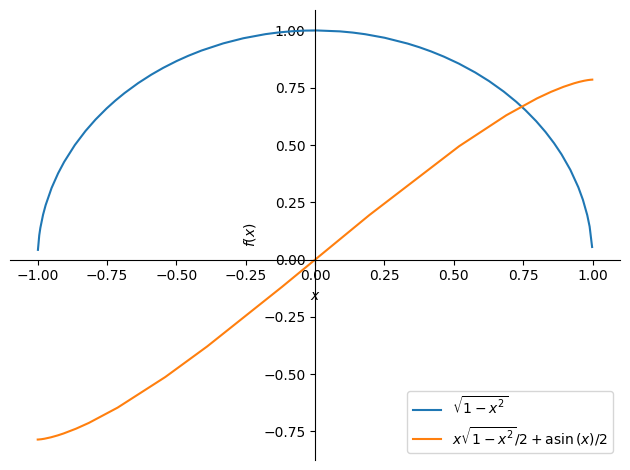

In [3]:
F = integrate(f, x)  # Technically the x is implicit here so integrate(f) would also work
plot(f, F, legend=True)

Notice, though, that SymPy does not add constant terms after it has integrated,

In [4]:
F

so a constant must be added afterwards manually if one in an exercise is asked to provide the indefinite integral,

In [5]:
C = symbols('C')

F = integrate(f, x) + C
F

To find the definite integral

\begin{equation*}
\int_{a}^b f(x)\; dx = F(b) - F(a),
\end{equation*}

one can make use of the anti-derivative as shown above and/or let SymPy do it with $\verb|integrate(f, (var, a, b))|$. For example, if we for  the Riemann integral are given:

\begin{equation*}
\int_{-1}^1 f(x)\; dx
\end{equation*}

In [6]:
# Simulated calculation by hand using the fundamental theorem of calculus
display(F.subs(x, 1) - F.subs(x, -1))

# SymPy's integrate function
integrate(f, (x, -1, 1))

## Integration in Multiple Dimensions

For functions of multiple variables the definite integral

\begin{equation*}
\int\int f(x_1, x_2)\; dx_1 \; dx_2
\end{equation*}

can be determined using SymPy with

```python
integrate(f, x1, x2)
```

and for definite integrals, the limits are added in `tuples` just as for integration in one dimension:

\begin{equation*}
\int_{a_1}^{b_1}\int_{a_2}^{b_2} f(x_1, x_2)\; dx_1 \; dx_2
\end{equation*}

```python
integrate(f, (x1, a1, b1), (x2, a2, b2))
```

For example, have a look at the function

In [7]:
x1, x2 = symbols('x1 x2')
f2 = (x1*x2)**3 - x1**2 + sin(3 * x2) + x1*x2**2 + 4
f2

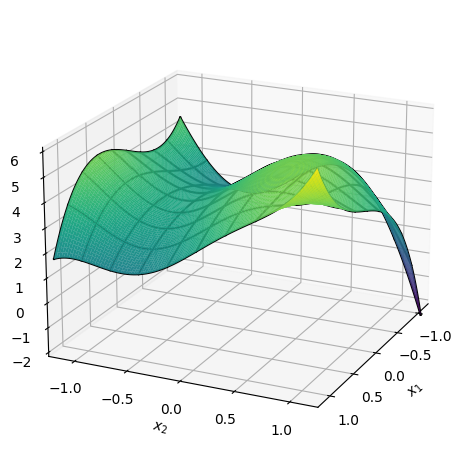

In [8]:
p = dtuplot.plot3d(f2, (x1, -1.2, 1.2), (x2, -1.2, 1.2), zlim=(-2, 6), use_cm=True, colorbar=False,
                   camera = {'azim': 25, 'elev': 20}, wireframe=True, show=False)

p.show()

An anti-derivative can be found with

In [9]:
integrate(f2, x1, x2) + C

and a definite volume under the graph can be found using the definite integral

In [10]:
integrate(f2, (x1, -1.2, 1.2), (x2, -1.2, 1.2))

## Tips and Tricks for making Sympy Integrate

When `SymPy` runs into problems with an integral, here are some tricks that often will help.

### Define Variables with Constraints

State information about the variables you define. Is it for example a real variable? Then tell that to SymPy. The most frequent of such definitions are 

- `real = True` 
- `positive = True` 
- `negative = True` 
- `nonnegative = True`
- `nonzero = True`

Some examples could be:

In [11]:
x1 = symbols('x1', real = True, nonnegative = True) # x1 is real and non-negative
x2 = symbols('x2', nonzero = True) # x2 is different from zero

### Simplify before Integration

Call `simplify` on the integrand before integration is carried out. This can in many cases reduce the time required for `SymPy` to integrate.

The work flow could look like this:

In [12]:
f = 1 / (x1 + x2)

integrand = simplify(f)
F = integrate(integrand, x1, x2)
F

### Utilize the Linearity of Integrals

Utilize the linearity of integrals. If you are to integrate the expression

\begin{equation*}
\int_{c}^{d}\int_{a}^{b} \alpha f_1(x_1,x_2) + \beta f_2(x_1,x_2) \:\mathrm dx\,\mathrm dy,
\end{equation*}

then it will often be to your advantage to work with 

\end{equation*}
\alpha \int_{c}^d\int_{a}^{b} f_1(x_1,x_2) \,\mathrm dx\,\mathrm dy + \beta \int_{c}^{d}\int_{a}^{b} f_2(x_1,x_2)\,\mathrm dx\,\mathrm dy.
\end{equation*}

An example could be

In [13]:
a = 3
b = 10
c = 2
d = 5
f = S(27)/3 * cos(x1) - 4 * atan(x2 -x1)

integrand1 = simplify(cos(x1)) # Here it is not necessary to use simplify
integrand2 = simplify(atan(x2 - x1))

F = S(27)/3 * integrate(integrand1, (x1, a,b), (x2, c,d)) - 4 * integrate(integrand2, (x1, a,b), (x2, c,d))
F

### Find an Anti-Derivative first and Insert Limits next

Sometimes `SymPy` can find an anti-derivative but not evaluate the definite integral. 

In such cases you can instead do the following:

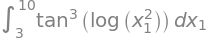

In [14]:
f = tan(ln(x1**2))**3 / x1

integrand = simplify(tan(ln(x1**2))**3)

F = integrate(integrand, (x1,a,b))
F

We can instead find an anti-derivative and then insert the limits ourselves:

In [15]:
F = integrate(f, x1)

F.subs(x1, b) - F.subs(x1, a)

### .doit()

If `SymPy` gives an output where the integration is not being carried out, one can in some cases force `SymPy` to evaluate the integral using 

\begin{equation*}
\verb|intragte(f, (x,a,b)).doit()|
\end{equation*}

This risks giving an error, though, and then one must use one of the other methods.

## Numerical Methods

You can in some cases risk that `SymPy` either uses incredibly long time or cannot find a result for an integral at all, even after you have helped it out as much as you can. In such cases you might have no other choice than to solve the integral numerically. Methods for that require the numerical libraries `numpy` and `scipy`. You have already used those in Math1 as well as in your physics and programming courses, but if you have not installed them yet, then you can do that with:

```{bash}
pip install numpy scipy
```

or if one uses `pip3`

```{bash}
pip3 install numpy scipy
```

In [16]:
# quad is a numerical integrator for functions of one variable
# nquad is a numerical integrator for functions of multiple variables
from scipy.integrate import quad, nquad
import numpy as np

ModuleNotFoundError: No module named 'scipy'

Below follows, respectively, an example of a numerical solution in one and in two dimensions.

### One Dimension

Let us have a look at the integral

\begin{equation*}
\int_{\pi}^{10} \frac{\tan^3(\ln(x^2))}{x} \,\mathrm dx.
\end{equation*}

In [ ]:
f1 = tan(ln(x**2))**3 / x

# Note: SymPy won't determine the limited integral
integrate(f1, (x,pi,10))

This is one of those cases where `SymPy` is able to find an analytical solution if we just help out a bit. But let us begin by solving the integral numerically.

Firstly we will convert $f_1$ to a python/lambda function. This is done with the function `lambdify` and corresponds, roughly speaking, to defining $f_1$ by `def f1(x):`

In [ ]:
f1_num = lambdify(x, f1, 'numpy')

# Now we can give f1_num a numerical value and get a numerical value back
f1_num(3)

Now, `quad` can be used to determine the integral

In [ ]:
F1_num, error1 = quad(f1_num, np.pi, 10)
F1_num, error1

The function `quad` provides two outputs. The numerical approximation of the integral as well as an estimated error (deviation) from the exact solution.

We can try to compare this with the analytical solution. First we can force SymPy to evaluate the integral with $\verb|.doit()|$, but this jsut results in an error:

In [ ]:
# Remove # to see the error yourself. Maple

# integrate(f1, (x, pi, 10)).doit()

Instead we can use `SymPy` to determine an anti-derivative, and then ourselves compute the definite integral:

In [ ]:
# ad: anti-derivative
F1_ad = integrate(f1, x)
F1_analytic = trigsimp(F1_ad.subs(x,10) - F1_ad.subs(x,pi))
F1_ad, F1_analytic

Let us compare the two results:

In [ ]:
F1_analytic.evalf() - F1_num

So, the numerical solution gives a fairly good approximation, but the two results are not entirely equal. Note that the true error that `quad` incurs is smaller than the estimated error of $3.4 \cdot 10^{−11}$. And that is not bad.

### Two Dimensions

Let us have a look at the expression

\begin{equation*}
\int_{0}^{\pi}\int_{-10}^{20} \sin(x)\cdot y^2\: \mathrm dy \,\mathrm dx.
\end{equation*}

Here `SymPy` has no problems finding a solution, so we can easily compare the analytical to the numerical method.

In [ ]:
x,y = symbols('x y', real = True)

f2 = sin(x)*y**2

F2_analytic = integrate(f2, (y,-10,20), (x,0,pi))
F2_analytic

To evaluate the integral numerically we must again convert $f_2$, using `lambdify`.

In [ ]:
f2_num = lambdify((x,y), f2, 'numpy')   # lambdify can take multiple variables

# Now f2_num is a numerical function of two variables
f2_num(3,4)

Now the integral can be determined using `nquad`. For a function of $n$ variables, `nquad` is called by:

\begin{equation*}
\verb|nquad(func, [[range for var_1], [range for var_2], ..., [range for var_n]]|)
\end{equation*}

In [ ]:
F2_num, error2 = nquad(f2_num, [[0, np.pi], [-10,20]])
F2_num, error2

The two methods can now be compared:

In [ ]:
F2_num - F2_analytic